<a href="https://colab.research.google.com/github/SergioCarmo-ro/Classifica-o-e-Valida-o-de-M-tricas/blob/main/Projeto_Classifica%C3%A7%C3%A3o_Valida%C3%A7%C3%A3o_e_M%C3%A9tricas1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Classificação: Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## <font color='dark'>Classificando dados</h1>

### Criando um modelo inicial

In [1]:
import pandas as pd


In [2]:
dados = pd.read_csv('/content/emp_automovel.csv')

In [3]:
dados

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [4]:
x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
modelo = DecisionTreeClassifier()
modelo.fit(x, y)
modelo.score(x, y)

1.0

In [7]:
print(f'Acurácia: {modelo.score(x, y)}')

Acurácia: 1.0


         
  Dados

  Validação   Treino  Teste            

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size=0.15, stratify=y, random_state=5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify=y, random_state=5)

In [10]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 1.0
Acurácia de validação: 0.8475742531138403


In [11]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.9205865272938444
Acurácia de validação: 0.9061057399181256


Avaliando o Modelo

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
y_previsto = modelo.predict(x_val)
matrix_confusao = confusion_matrix(y_val, y_previsto)
matrix_confusao

array([[10359,   120],
       [  958,    44]])

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

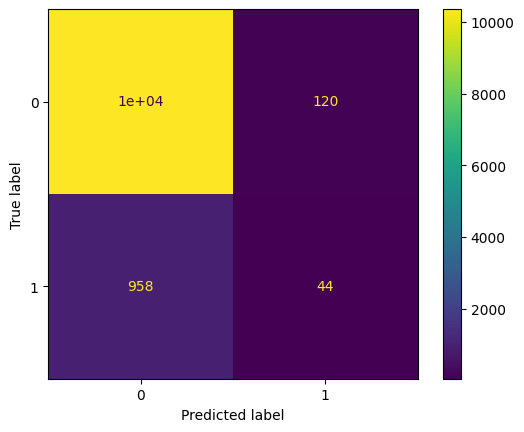

In [15]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matrix_confusao)
visualizacao.plot();

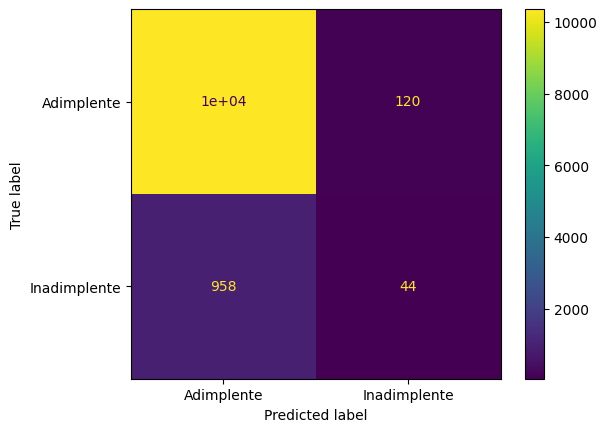

In [16]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matrix_confusao, display_labels=['Adimplente', 'Inadimplente'])
visualizacao.plot();

Desafio:

Utilize o algoritmo Random Forest para criar um modelo e avaliar o desempenho com a acurácia e a matriz de confusão, e compare os resultados com o resultado da árvore de decisão.

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

In [18]:
modelo = RandomForestClassifier(max_depth = 10)
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.9155632984901277
Acurácia de validação: 0.9128995732079087


Ao executar o código, teremos o seguinte resultado:

Acurácia de treino: 0.9154761904761904

Acurácia de validação: 0.9127253723543245

Esse resultado mostra que o RandomForest teve uma acurácia melhor do que a árvore de decisão, indicando que o modelo tem uma taxa de acerto geral melhor.


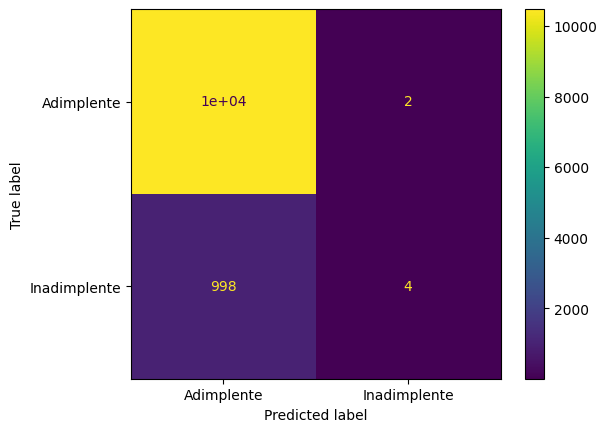

In [19]:
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
visualizacao = ConfusionMatrixDisplay(confusion_matrix= matriz_confusao,
                                      display_labels = ['Adimplente', 'Inadimplente'])
visualizacao.plot();


Acurácia, precisão e recall


In [20]:
from sklearn.metrics import accuracy_score

In [21]:
print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')

Acurácia: 0.9128995732079087


In [22]:
from sklearn.metrics import precision_score, recall_score

In [23]:
print(f'Precisão: {precision_score(y_val, y_previsto)}')
print(f'Recall: {recall_score(y_val, y_previsto)}')

Precisão: 0.6666666666666666
Recall: 0.003992015968063872


In [24]:
from sklearn.metrics import f1_score


In [25]:
print(f'F1 Score: {f1_score(y_val, y_previsto)}')

F1 Score: 0.007936507936507936


Curva ROC

In [26]:
from sklearn.metrics import RocCurveDisplay

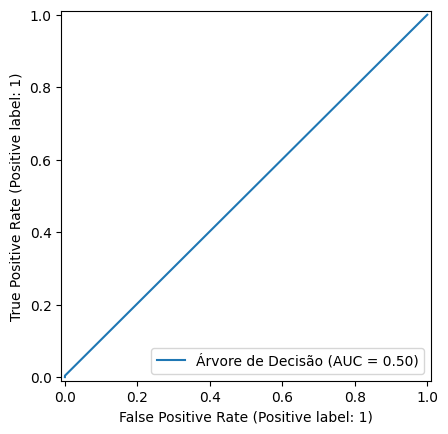

In [27]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name='Árvore de Decisão');

In [28]:
from sklearn.metrics import roc_auc_score

In [29]:
print(f'AUC: {roc_auc_score(y_val, y_previsto)}')

AUC: 0.5019005790308876


# AULA 06
Curva de precisão x Recall

In [30]:
from sklearn.metrics import PrecisionRecallDisplay

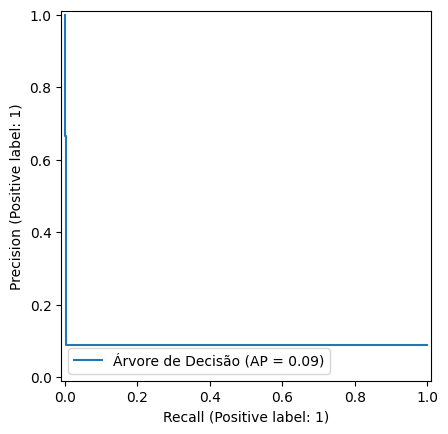

In [31]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name='Árvore de Decisão');

In [32]:
from sklearn.metrics import average_precision_score

In [33]:
print(f'AP: {average_precision_score(y_val, y_previsto)}')

AP: 0.08958756991721635


# ALUA 07

Relatório de métricas

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     10479
           1       0.67      0.00      0.01      1002

    accuracy                           0.91     11481
   macro avg       0.79      0.50      0.48     11481
weighted avg       0.89      0.91      0.87     11481



 # Usando o KFold

In [36]:
from sklearn.model_selection import cross_validate, KFold

In [37]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, x, y, cv=kf)
cv_resultados

{'fit_time': array([0.36004519, 0.31217909, 0.31129575, 0.34317422, 0.33678842]),
 'score_time': array([0.00461721, 0.00468659, 0.00442886, 0.00512099, 0.00507784]),
 'test_score': array([0.91301034, 0.90733885, 0.90733885, 0.91365418, 0.89928136])}

In [38]:
cv_resultados['test_score']

array([0.91301034, 0.90733885, 0.90733885, 0.91365418, 0.89928136])

In [39]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confianca:[{media - 2*desvio_padrao}, {min(media - 2*desvio_padrao, 1)}]')



Intervalo de confianca:[0.8977754376192917, 0.8977754376192917]


# Validação cruzada com recall

In [40]:
def intervalo_confianca(resultados):
  media = resultados['test_score'].mean()
  desvio_padrao = resultados['test_score'].std()
  print(f'Intervalo de confianca:[{media - 2*desvio_padrao}, {min(media - 2*desvio_padrao, 1)}]')

In [41]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, x, y, cv=kf, scoring='recall')
cv_resultados

{'fit_time': array([0.3447001 , 0.25938869, 0.22707319, 0.23360133, 0.2283113 ]),
 'score_time': array([0.00889468, 0.00567055, 0.00565052, 0.00599074, 0.00636268]),
 'test_score': array([0.02906209, 0.0210396 , 0.0196802 , 0.0156658 , 0.02427746])}

In [42]:
intervalo_confianca(cv_resultados)

Intervalo de confianca:[0.012935222059937893, 0.012935222059937893]


# Estratificando os dados

In [43]:
dados['inadimplente'].value_counts(normalize=True)

,proportion
inadimplente,
0,0.912707
1,0.087293


In [44]:
from sklearn.model_selection import StratifiedKFold

In [45]:
model = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, x, y, cv=skf, scoring='recall')

In [46]:
intervalo_confianca(cv_resultados)

Intervalo de confianca:[0.019625119279235166, 0.019625119279235166]


# Oversampling

In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
over_sampling = SMOTE()
x_balanceado, y_balanceado = over_sampling.fit_resample(x, y)

In [49]:
y_balanceado.value_counts(normalize=True)

,proportion
inadimplente,
0,0.5
1,0.5


In [50]:
DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, x_balanceado, y_balanceado, cv=skf, scoring='recall')

In [51]:
intervalo_confianca(cv_resultados)


Intervalo de confianca:[0.6976853780707716, 0.6976853780707716]


#  Pipeline para validação

In [52]:
from imblearn.pipeline import Pipeline as imbpipeline

In [53]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline(steps=[('oversample', SMOTE()), ('arvore', modelo)])

In [54]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, x_balanceado, y_balanceado, cv=skf, scoring='recall')

In [55]:
intervalo_confianca(cv_resultados)

Intervalo de confianca:[0.6975701570210474, 0.6975701570210474]



# Undersampling

In [57]:
from imblearn.under_sampling import NearMiss

In [58]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline(steps=[('Undersampling', NearMiss(version=3)), ('arvore', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, x_balanceado, y_balanceado, cv=skf, scoring='recall')

/usr/local/lib/python3.11/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:206: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:206: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:206: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:206: UserWarning: The n

In [59]:
# Esse será o modelo que será escolhido
intervalo_confianca(cv_resultados)

Intervalo de confianca:[0.5758768757041735, 0.5758768757041735]


# Testando o modelo

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.69      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



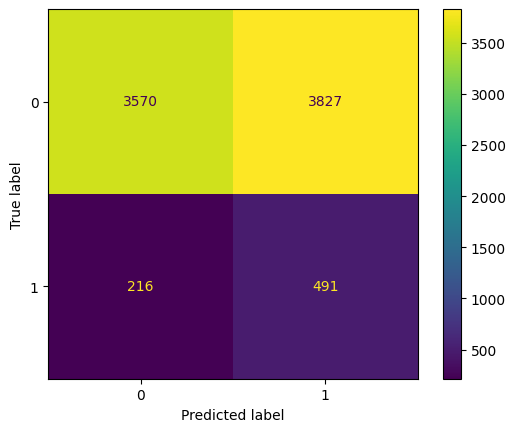

In [60]:
undersample = NearMiss(version=3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_teste)

print(classification_report(y_teste, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto);